# 2.2 評估偏誤和變異

## 驗證曲線(validation_curve)
### 同一個演算法在不同超參數(hyperparameter)

In [1]:
# --- 第 1 部分 ---
# 載入函式庫與資料
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsClassifier
bc = load_breast_cancer()


In [2]:
# --- 第 2 部分 ---
# 計算訓練資料集以及驗證資料集準確率
x, y = bc.data, bc.target
learner = KNeighborsClassifier()
param_range = [2,3,4,5]
train_scores, test_scores = validation_curve(learner,  # 模型
                                             x,        # 資料集的特徵 
                                             y,        # 資料集的標籤
                                             param_name = 'n_neighbors',  # 欲調整的超參數
                                             param_range = param_range,   # 超參數的範圍
                                             cv=10,                       # 交叉驗證的折數
                                             scoring = "accuracy")        # 評價指標   


In [3]:
# --- 第 3 部分 ---
# 對每個超參數計算模型準確率的平均數與標準差
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


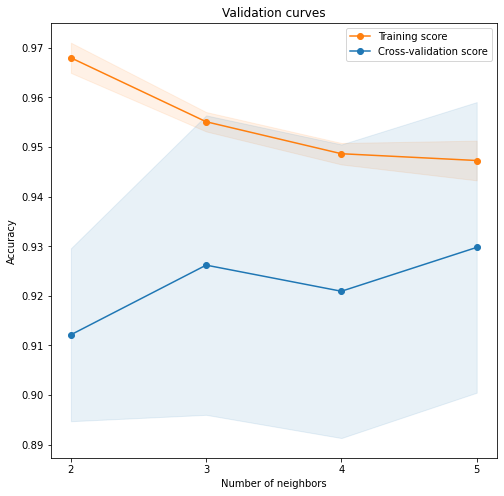

In [7]:
# --- 第 4 部分 ---
# 繪製折線圖
plt.figure(figsize = (8, 8))
plt.title('Validation curves')
# 繪製標準差
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="C1")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="C0")

# 繪製平均數
plt.plot(param_range, train_scores_mean, 'o-', color="C1",
         label="Training score")
plt.plot(param_range, test_scores_mean, 'o-', color="C0",
         label="Cross-validation score")
plt.xticks(param_range)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.show()


## 學習曲線(learning_curve)
### 嘗試不同大小的訓練資料集

In [8]:
# --- 第 1 部分 ---
# 載入函式庫與資料
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
bc = load_breast_cancer()

In [9]:
# --- 第 2 部分 ---
# 計算訓練資料集以及驗證資料集準確率
x, y = bc.data, bc.target
learner = KNeighborsClassifier()
train_sizes = [50, 100, 150, 200, 250, 300]
train_sizes, train_scores, test_scores = learning_curve(
    learner, x, y,
    train_sizes = train_sizes,
    cv=10)


In [10]:
# --- 第 3 部分 ---
# 對準確率平均數與標準差
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


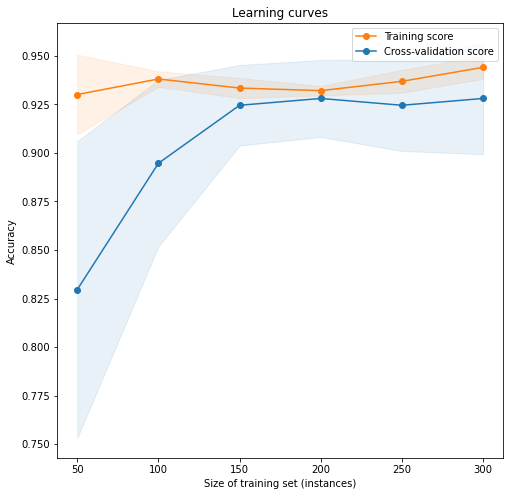

In [11]:
# --- 第 4 部分 ---
# 繪製折線圖
plt.figure(figsize = (8, 8))
plt.title('Learning curves')
# 繪製標準差
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="C1")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="C0")

# 繪製平均值
plt.plot(train_sizes, train_scores_mean, 'o-', color="C1",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="C0",
         label="Cross-validation score")

plt.xticks(train_sizes)
plt.xlabel('Size of training set (instances)')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.show()